In [60]:
import pandas as pd
import copy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [167]:
def preprocessing(df, decoder = False) :
    '''
    :param col_name: 특정한 컬럼만 Scale하고 싶을 경우 list로 컬럼 이름을 받는다.
    :param decoder:  MinMax Scaler를 다시 원복 시키고 싶을 때 (True, False)
    :return:

    MinMax Scaler를 통해 Nomarlization을 하거나 예측 후 주가를 원복 시키는데 사용한다.
    '''
    min_price = df['Price'].min()
    max_price = df['Price'].max()
    gap = max_price - min_price
    normal_price = (df['Price'] - min_price) / (max_price - min_price)
    normal = pd.DataFrame()
    normal['Date'] = df['Date']
    normal['Price'] = normal_price.values
    return normal, min_price, max_price, gap

In [199]:
data = pd.read_csv(r'./data/Stock_Price.csv')
data.head()
seq_len = 128

In [169]:
col = ['Open', 'High', 'Low', 'Close']
avg = np.mean(data[col], axis = 1)
date = data.loc[:,'Date'].values
price = avg.values
stock = pd.DataFrame()
stock['Date'] = date
stock['Price'] = price

print(stock['Price'])

0        12675.00
1        12537.50
2        12462.50
3        12862.50
4        12750.00
           ...   
56425     3851.25
56426     3883.75
56427     3930.00
56428     4048.75
56429     4060.00
Name: Price, Length: 56430, dtype: float64


In [185]:
def visualization(df, x_col = 'Price' ,  x_label = 'Price', y_col = 'Date', y_label = 'Avg Price', title = 'Price', name = None) :
    try :
        fig = plt.figure(figsize=(15,10))
        st = fig.suptitle("Price Flow", fontsize=20)
        st.set_y(0.92)

        ax1 = fig.add_subplot(211)
        ax1.plot(df[x_col], label = 'Price')
        ax1.set_xticks(range(0, df.shape[0], 1464))
        ax1.set_xticklabels(df[y_col].loc[::1464])
        ax1.set_ylabel(y_label, fontsize=18)
        ax1.legend(loc="upper left", fontsize=12)
        
    except :
        print('Graph of Stock Price is not saved ' + name)
        return 1
    return 0

0

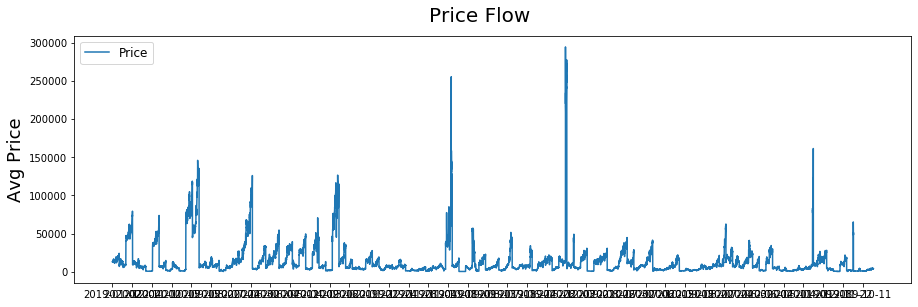

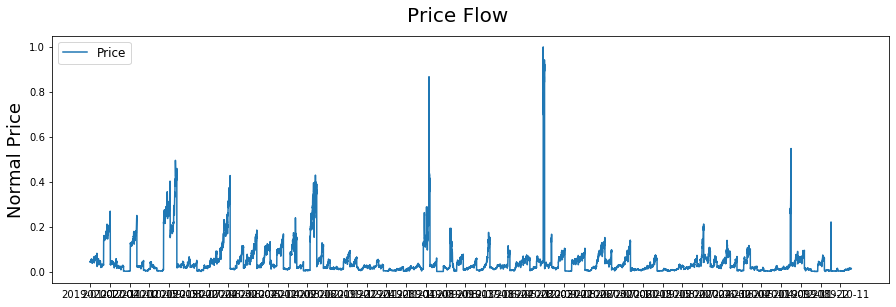

In [186]:
visualization(stock, name = 'Preprocessing')
normal, max_num, min_num, gap = preprocessing(stock)
normal.head()
visualization(normal, y_label = 'Normal Price', name = 'normal')

In [191]:
def split_dataset(df) :
    '''
    train data, validation data, test data로 나누는 함수
    '''
    times = sorted(df.index.values)
    last_10pct = sorted(df.index.values)[-int(0.1 * len(times))]
    last_20pct = sorted(df.index.values)[-int(0.2 * len(times))]

    df_train = df[(df.index < last_20pct)]
    df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
    df_test = df[(df.index >= last_10pct)]


    df_train.drop(columns=['Date'], inplace=True)
    df_val.drop(columns=['Date'], inplace=True)
    df_test.drop(columns=['Date'], inplace=True)

    train_data = df_train.values
    val_data = df_val.values
    test_data = df_test.values
    print('Training data shape: {}'.format(train_data.shape))
    print('Validation data shape: {}'.format(val_data.shape))
    print('Test data shape: {}'.format(test_data.shape))
    return (df_train, train_data, df_val, val_data, df_test, test_data)

In [192]:
df_train, train_data, df_val, val_data, df_test, test_data = split_dataset(normal)

Training data shape: (45144, 1)
Validation data shape: (5643, 1)
Test data shape: (5643, 1)


c:\python37\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [195]:
def visualization_dataset(df_train, train_data, df_val, val_data, df_test, test_data, name = None) :
    try :
        fig = plt.figure(figsize=(15,12))
        st = fig.suptitle("Data Separation", fontsize=20)
        st.set_y(0.95)

        ax1 = fig.add_subplot(211)
        ax1.plot(np.arange(train_data.shape[0]), df_train['Price'], label='Training data')

        ax1.plot(np.arange(train_data.shape[0], 
                           train_data.shape[0]+val_data.shape[0]), df_val['Price'], label='Validation data')

        ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                           train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Price'], label='Test data')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Normalized Closing Returns')
        ax1.set_title("Close Price", fontsize=18)
        ax1.legend(loc="best", fontsize=12)
    except :
        print('Graph of Stock Price is not saved ' + name)
        return 1
    return 0

0

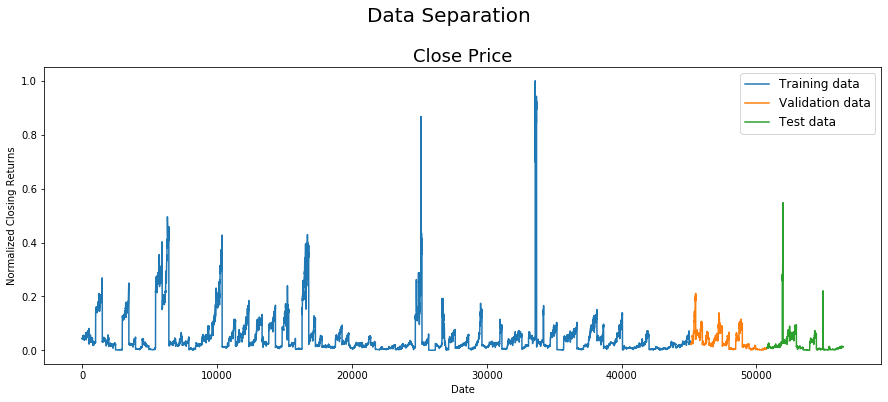

In [197]:
visualization_dataset(df_train, train_data, df_val, val_data, df_test, test_data)

In [212]:
x_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  x_train.append(train_data[i-seq_len]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[i]) #Value of 4th column (Close Price) of df-row 128+1
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train)
print(y_train)

[[0.04269861]
 [0.04223164]
 [0.04197692]
 ...
 [0.02446107]
 [0.02556483]
 [0.0259469 ]]
[[0.04354766]
 [0.04499104]
 [0.04469388]
 ...
 [0.02360353]
 [0.02367145]
 [0.0232724 ]]
